# 1. Load and Explore the Dataset

In [1]:
# Imports.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
# Load Digits Dataset.
digits = load_digits()
X, y = digits.data, digits.target

# Display Dataset Shapes of X & Y.
print("Dataset shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split Dataset into Training & Testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)

# Display Shapes of Split Datasets.
print("\nTrain/Test split shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dataset shapes:
X shape: (1797, 64)
y shape: (1797,)

Train/Test split shapes:
X_train shape: (1297, 64)
y_train shape: (1297,)
X_test shape: (500, 64)
y_test shape: (500,)


# 2. Visualize Training Data

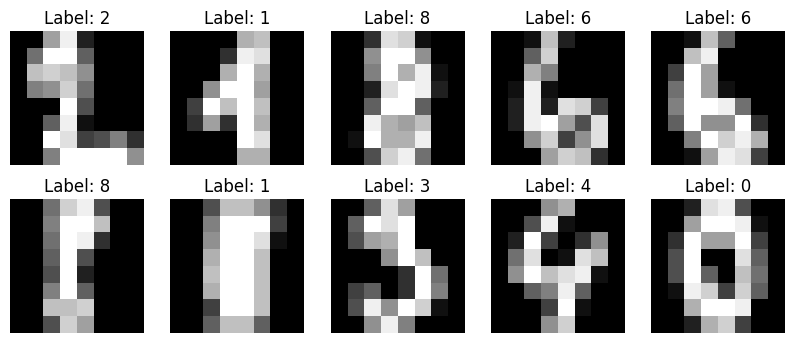

In [3]:
# Select 10 Random Images from Training Data (from X).
indices = np.random.choice(X_train.shape[0], 10, replace=False)
images = X_train[indices].reshape(-1, 8, 8)
labels = y_train[indices]

# Display Images.
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

# 3. Implement the k-Nearest Neighbor Classifier

In [4]:
# Define the k values.
k_values = [1, 3, 5, 7, 9]

# Dictionary to hold Classifiers.
classifiers = {}

# Train Classifiers.
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    classifiers[k] = classifier
    print(f"Trained k-NN classifier with k = {k}")


Trained k-NN classifier with k = 1
Trained k-NN classifier with k = 3
Trained k-NN classifier with k = 5
Trained k-NN classifier with k = 7
Trained k-NN classifier with k = 9


# 4. Evaluate and Compare Classifiers

In [5]:
# Calculate F1 scores per Classifier.
f1_scores = {}
for k, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[k] = f1

# Display F1 Scores in Table.
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['k', 'F1 Score'])
print("F1 scores for each k value:")
print(f1_df)


F1 scores for each k value:
   k  F1 Score
0  1  0.984033
1  3  0.989941
2  5  0.993981
3  7  0.991967
4  9  0.981890


# 5. Analysis of k Values on Model Performance

#### Starting out when k = 1:
The classifier achieves an F1 score of 0.984033.
Since when k=1 it only considers the nearest neighbor, the model may be sensitive to noise or outliers in the data.

#### For k = 3 and k = 5:
Increasing k to 3 results in a higher F1 score of 0.989941.
At k=5, the F1 score peaks at 0.993981, indicating the best performance among all tested k values.
This suggests that when considering more neighbors it helps the classifier make better decisions by averaging out anomalies.

#### k = 7 and k = 9:
At k=7, the F1 score slightly decreases to 0.991967.
When k increases to 9, the F1 score drops more noticeably to 0.981890.
This decline between 7 and 9 indicates that including too many neighbors may introduce instances from other classes, leading to misclassification.

#### Overall Observation:
The classifiers performance increases from k = 1 through to k = 5, reaching its peak at k = 5. After that from k = 5 to k = 9, the performance starts to decline. Suggesting the optimal k value is 5. The smaller a k value is in this model, may cause the model to overfit, while a larger k such as k = 9, may cause underfitting from oversmoothing the decision boundaries.


# 6. Visualize Qualitative Predictions

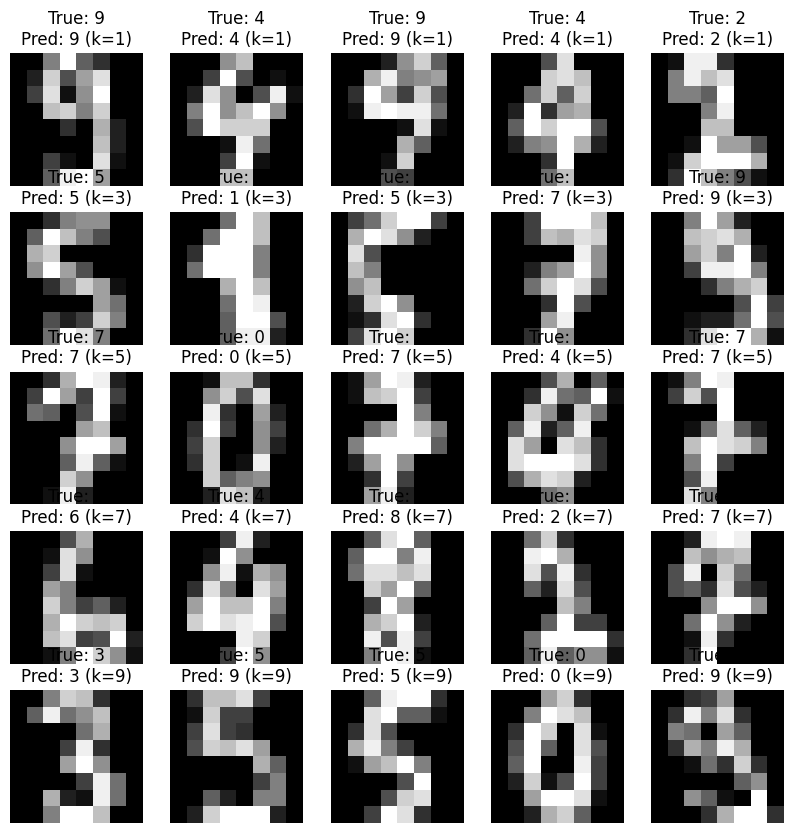

In [6]:
# Randomly Select Images from X_Test for Predictions.
plt.figure(figsize=(10, 10))
for idx, k in enumerate(k_values):
    indices = np.random.choice(X_test.shape[0], 5, replace=False)
    images = X_test[indices].reshape(-1, 8, 8)
    true_labels = y_test[indices]
    pred_labels = classifiers[k].predict(X_test[indices])

    for i in range(5):
        plt.subplot(len(k_values), 5, idx * 5 + i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]} (k={k})")
        plt.axis('off')
plt.show()
